<a href="https://colab.research.google.com/github/alishaarora56/Brainwave-Emotion-Detection/blob/main/Brainwave_Emotion_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

Load Data 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving emotions.csv to emotions.csv


In [4]:
data=pd.read_csv('emotions.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.70,27.9,3.170,32.2,-368.0,15.90,36.4,7.08,28.8,-359.0,17.30,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.600,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.00,-185.00,-185.00,374.00,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.20,32.9,31.800,33.1,33.2,28.50,26.8,32.40,34.7,33.8,27.00,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.530,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.00,40.70,40.70,-19.00,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.40,20.0,79.800,31.0,-408.0,91.90,29.5,18.80,31.1,-335.0,32.20,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.000,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.00,-48.80,-48.80,159.00,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.90,27.7,15.700,30.7,-142.0,20.70,22.8,13.60,32.2,-135.0,21.20,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.830,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.90,-5.08,-5.08,-61.90,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.00,22.9,59.400,26.7,60.3,64.70,26.9,32.30,30.1,33.6,31.60,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.600,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.90,-7.25,-7.25,15.90,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,33.30,33.4,31.0,32.30,18.6,30.00,33.0,32.6,29.50,29.1,32.000,29.9,32.6,28.50,24.9,34.50,32.4,32.4,33.00,20.8,3.3500,0.461,-1.61000,2.880,-10.60,1.31,3.490,-1.540,3.860

<function matplotlib.pyplot.show>

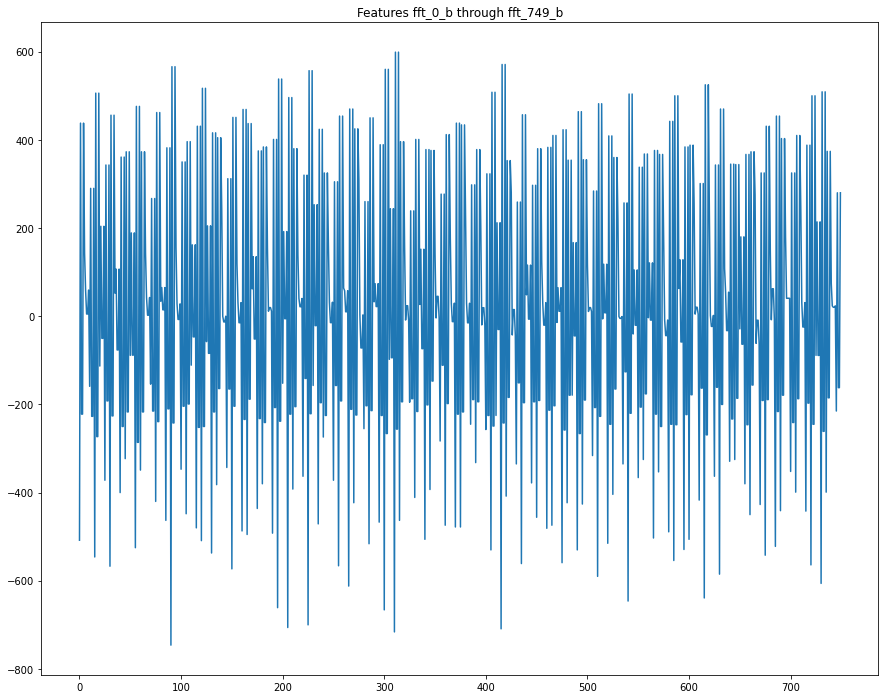

In [6]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(15,12))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show

In [7]:
data['label'].value_counts()

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64

In [8]:
label_mapping = {'NEGATIVE':0, 'NEUTRAL':1, 'POSITIVE':2}

Preprocessing 

In [9]:
def preprocess_inputs(df):
  df=df.copy()
  df['label'] = df['label'].replace(label_mapping)
  y=df['label'].copy()
  X=df.drop('label',axis=1).copy()
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

  return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [11]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,17.700,31.1,-101.0,20.40,27.7,14.700,30.6,-120.0,20.00,22.3,5.45,27.1,-120.0,13.70,19.8,19.500,30.1,-106.0,20.10,21.9,3.020,0.4640,18.900,0.3540,5.38,12.30,3.990,18.90,6.67,7.8200,...,-202.0,174.00,-89.900,-89.900,174.00,148.0,25.00,-29.80,-29.80,25.00,269.000,-103.00,63.50,63.50,-103.00,-71.2,85.60,-61.30,-61.30,85.60,29.8,107.0,-68.40,-68.40,107.0,269.0,28.40,-58.30,-58.30,28.40,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,13.300,22.2,16.0,7.73,25.8,10.800,22.3,20.4,6.78,22.8,15.20,26.0,20.4,9.75,28.9,15.500,20.8,29.0,9.36,31.0,2.550,-0.0606,-4.470,0.9500,3.00,-1.83,-3.760,-4.40,-2.02,-3.0700,...,178.0,-60.50,-0.106,-0.106,-60.50,124.0,-57.90,26.10,26.10,-57.90,163.000,-36.70,17.90,17.90,-36.70,138.0,-54.70,-66.90,-66.90,-54.70,68.6,-46.5,-58.00,-58.00,-46.5,160.0,-38.90,-3.29,-3.29,-38.90,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,-0.199,29.3,-580.0,15.10,24.1,0.109,24.5,-569.0,13.10,27.6,1.79,22.6,-559.0,11.10,38.0,-4.680,22.7,-606.0,8.42,22.0,-0.308,4.7800,-11.300,2.0100,-3.48,-1.99,6.680,-21.00,3.99,-13.9000,...,-873.0,653.00,-355.000,-355.000,653.00,-571.0,634.00,-289.00,-289.00,634.00,-41.000,158.00,-50.50,-50.50,158.00,-719.0,566.00,-342.00,-342.00,566.00,-680.0,685.0,-317.00,-317.00,685.0,-112.0,235.00,-71.00,-71.00,235.00,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,25.700,33.2,27.5,27.10,30.0,30.600,32.1,34.9,33.10,23.7,28.40,33.8,32.9,30.30,21.1,28.000,31.4,33.0,30.60,23.5,-4.860,1.1300,-7.380,-5.9600,6.26,-2.70,-0.581,-5.35,-3.13,8.8800,...,155.0,-9.87,-28.400,-28.400,-9.87,136.0,2.17,-1.11,-1.11,2.17,48.200,-12.60,53.00,53.00,-12.60,206.0,-4.30,-55.10,-55.10,-4.30,168.0,18.9,-37.20,-37.20,18.9,131.0,9.69,10.90,10.90,9.69,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,32.700,29.9,34.9,31.80,32.5,35.800,33.4,34.3,31.70,21.0,27.00,32.0,32.3,27.50,23.8,31.900,28.5,36.1,32.30,18.9,-3.170,-3.5500,0.668,0.0455,11.60,5.63,-2.180,2.60,4.31,8.7400,...,131.0,-9.38,-7.340,-7.340,-9.38,126.0,-14.00,41.30,41.30,-14.00,124.000,-13.80,16.70,16.70,-13.80,157.0,-17.10,-7.39,-7.39,-17.10,129.0,-14.5,12.00,12.00,-14.5,112.0,-23.40,41.60,41.60,-23.40,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,8.190,33.9,-662.0,59.30,34.3,5.890,34.5,-732.0,32.50,23.2,5.86,31.5,-766.0,19.00,23.5,7.350,31.6,-803.0,20.10,27.1,2.300,-0.6200,70.100,26.8000,11.10,2.34,

In [12]:
print(X_train.dtypes)

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_745_b     float64
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
Length: 2548, dtype: object


Modelling 

In [13]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

X_train=np.asarray(X_train).astype(np.float)
y_train=np.asarray(y_train).astype(np.float)

history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 227s 6s/step - loss: 34.5555 - accuracy: 0.7670 - val_loss: 31.5808 - val_accuracy: 0.6689
Epoch 2/50
38/38 [==============================] - 224s 6s/step - loss: 17.1199 - accuracy: 0.8642 - val_loss: 11.2725 - val_accuracy: 0.9331
Epoch 3/50
38/38 [==============================] - 225s 6s/step - loss: 4.1069 - accuracy: 0.9480 - val_loss: 1.2648 - val_accuracy: 0.9498
Epoch 4/50
38/38 [==============================] - 224s 6s/step - loss: 0.6081 - accuracy: 0.9816 - val_loss: 10.1451 - val_accuracy: 0.8997
Epoch 5/50
38/38 [==============================] - 225s 6s/step - loss: 0.2826 - accuracy: 0.9933 - val_loss: 4.6971 - val_accuracy: 0.9331
Epoch 6/50
38/38 [==============================] - 224s 6s/step - loss: 0.5223 - accuracy: 0.9866 - val_loss: 1.4622 - val_accuracy: 0.9632
Epoch 7/50
38/38 [==============================] - 225s 6s/step - loss: 0.2570 - accuracy: 0.9891 - val_loss: 8.3849 - val_accuracy: 0.8997
Epoch 8/

Results

In [15]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 93.125%


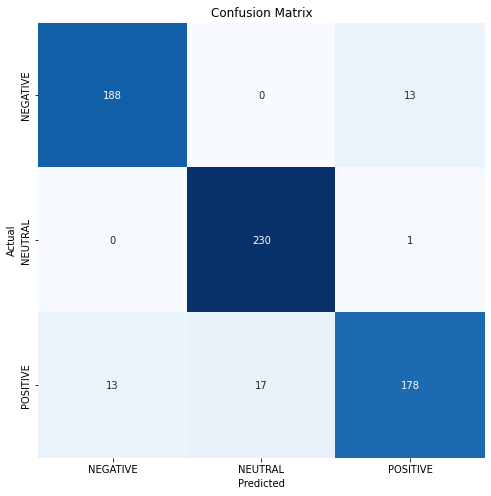

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.94      0.94       201
     NEUTRAL       0.93      1.00      0.96       231
    POSITIVE       0.93      0.86      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [16]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)